In [1]:
# 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('data/household.csv')

In [3]:
df

,total,food,house,energy,furniture,cloth,medical,trans,education,amenity
0,309621,66863,16557,24955,9241,18368,10749,31231,12527,29620
1,290663,68872,18454,25677,8721,13673,11679,30968,14478,28000
2,335341,74025,18399,25331,10427,17428,11661,38961,17698,34350
3,335276,72157,18815,22908,8959,17032,11153,41060,24041,32382
4,308566,75402,19244,21074,10685,17284,11239,35889,11511,32399
5,297648,71592,21145,18435,11252,16037,11047,34111,9375,30647
6,326480,74206,24477,18610,14417,17319,11764,40336,11263,34338
7,309993,76242,18669,20289,10575,12013,11052,35290,8517,36632
8,296457,71947,19445,20701,9724,12473,9889,36348,16241,28501


In [4]:
# correlation coefficient
corr = df.corr(method='pearson')
corr.loc[['total']]

,total,food,house,energy,furniture,cloth,medical,trans,education,amenity
total,1.0,0.36482,0.133464,0.112311,0.26487,0.56455,0.407846,0.809912,0.504157,0.646937


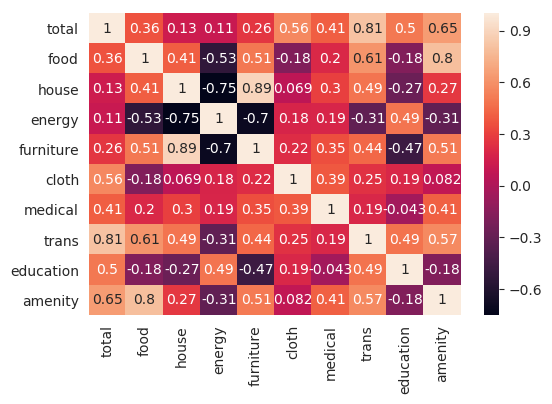

In [5]:
# heat map
plt.figure(dpi=100)
sns.heatmap(corr, annot=True)
plt.show()

In [6]:
# 2 regression
from sklearn.linear_model import LinearRegression

In [7]:
X = df.drop('total', axis=1)
X_col = X.columns
y = df['total']

X = np.array(X)
y = np.array(y)

In [8]:
clf = LinearRegression()
clf.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
coef = clf.coef_
intercept = clf.intercept_
score = clf.score(X, y)

In [10]:
coef

array([-2.49246967, -1.4214542 ,  1.42400621, -0.56053703,  1.35219246,
        1.19308718,  4.90196429, -0.83202514,  2.72979714])

In [11]:
intercept

208265.24016486775

In [12]:
coefficient = pd.DataFrame(coef.reshape(1, 9), columns=X_col, index=['coef'])
coefficient

,food,house,energy,furniture,cloth,medical,trans,education,amenity
coef,-2.49247,-1.421454,1.424006,-0.560537,1.352192,1.193087,4.901964,-0.832025,2.729797


In [13]:
print('Intercept =', intercept)
print('score = ', score)

Intercept = 208265.24016486775
score =  1.0
